# Uniprot services demo

What is UniProt ?

URL: http://www.uniprot.org

    "The Universal Protein Resource (UniProt) is a comprehensive resource for protein
    sequence and annotation data. The UniProt databases are the UniProt
    Knowledgebase (UniProtKB), the UniProt Reference Clusters (UniRef), and the
    UniProt Archive (UniParc). The UniProt Metagenomic and Environmental Sequences
    (UniMES) database is a repository specifically developed for metagenomic and
    environmental data."

    -- From Uniprot web site (help/about) , Dec 2012


In [1]:
from bioservices import UniProt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
u = UniProt(cache=True)

## 1. Search information about a protein

The search() function return the raw output obtained from the service:

### 1.1 raw data

In [3]:
print(u.search("P43403", frmt="txt"))

ID   ZAP70_HUMAN             Reviewed;         619 AA.
AC   P43403; A6NFP4; Q6PIA4; Q8IXD6; Q9UBS6;
DT   01-NOV-1995, integrated into UniProtKB/Swiss-Prot.
DT   01-NOV-1995, sequence version 1.
DT   07-JUN-2017, entry version 203.
DE   RecName: Full=Tyrosine-protein kinase ZAP-70;
DE            EC=2.7.10.2;
DE   AltName: Full=70 kDa zeta-chain associated protein;
DE   AltName: Full=Syk-related tyrosine kinase;
GN   Name=ZAP70; Synonyms=SRK;
OS   Homo sapiens (Human).
OC   Eukaryota; Metazoa; Chordata; Craniata; Vertebrata; Euteleostomi;
OC   Mammalia; Eutheria; Euarchontoglires; Primates; Haplorrhini;
OC   Catarrhini; Hominidae; Homo.
OX   NCBI_TaxID=9606;
RN   [1]
RP   NUCLEOTIDE SEQUENCE [MRNA] (ISOFORM 1), FUNCTION, INTERACTION WITH
RP   CD247, TISSUE SPECIFICITY, AND PHOSPHORYLATION.
RX   PubMed=1423621; DOI=10.1016/0092-8674(92)90598-7;
RA   Chan A.C., Iwashima M., Turck C.W., Weiss A.;
RT   "ZAP-70: a 70 kd protein-tyrosine kinase that associates with the TCR
RT   zeta chain.";
R

## 1.2 Fasta 

In [3]:
print(u.search("P43403", frmt="fasta"))

>sp|P43403|ZAP70_HUMAN Tyrosine-protein kinase ZAP-70 OS=Homo sapiens GN=ZAP70 PE=1 SV=1
MPDPAAHLPFFYGSISRAEAEEHLKLAGMADGLFLLRQCLRSLGGYVLSLVHDVRFHHFP
IERQLNGTYAIAGGKAHCGPAELCEFYSRDPDGLPCNLRKPCNRPSGLEPQPGVFDCLRD
AMVRDYVRQTWKLEGEALEQAIISQAPQVEKLIATTAHERMPWYHSSLTREEAERKLYSG
AQTDGKFLLRPRKEQGTYALSLIYGKTVYHYLISQDKAGKYCIPEGTKFDTLWQLVEYLK
LKADGLIYCLKEACPNSSASNASGAAAPTLPAHPSTLTHPQRRIDTLNSDGYTPEPARIT
SPDKPRPMPMDTSVYESPYSDPEELKDKKLFLKRDNLLIADIELGCGNFGSVRQGVYRMR
KKQIDVAIKVLKQGTEKADTEEMMREAQIMHQLDNPYIVRLIGVCQAEALMLVMEMAGGG
PLHKFLVGKREEIPVSNVAELLHQVSMGMKYLEEKNFVHRDLAARNVLLVNRHYAKISDF
GLSKALGADDSYYTARSAGKWPLKWYAPECINFRKFSSRSDVWSYGVTMWEALSYGQKPY
KKMKGPEVMAFIEQGKRMECPPECPPELYALMSDCWIYKWEDRPDFLTVEQRMRACYYSL
ASKVEGPPGSTQKAEAACA



## 1.3 Tabulated data

In [5]:
print(u.search("ZAP70_HUMAN", frmt="tab"))

Entry	Entry name	Status	Protein names	Gene names	Organism	Length
P43403	ZAP70_HUMAN	reviewed	Tyrosine-protein kinase ZAP-70 (EC 2.7.10.2) (70 kDa zeta-chain associated protein) (Syk-related tyrosine kinase)	ZAP70 SRK	Homo sapiens (Human)	619



restrict the number of columns

In [6]:
res = u.search("ZAP70_HUMAN", frmt="tab", columns="id,genes")
print(res)

Entry	Gene names
P43403	ZAP70 SRK



## 1.4 Pandas dataframe

In [4]:
df = u.get_df(["ZAP_HUMAN", "P43403"])
df

,Entry,Entry name,Gene names,Gene names (primary ),Gene names (synonym ),Gene names (ordered locus ),Gene names (ORF ),Organism,Organism ID,Protein names,...,Taxonomic lineage IDs (GENUS),Taxonomic lineage IDs (SUBGENUS),Taxonomic lineage IDs (SPECIES GROUP),Taxonomic lineage IDs (SPECIES SUBGROUP),Taxonomic lineage IDs (SPECIES),Taxonomic lineage IDs (SUBSPECIES),Taxonomic lineage IDs (VARIETAS),Taxonomic lineage IDs (FORMA),Cross-reference (db_abbrev),Cross-reference (EMBL)
0,P43403,ZAP70_HUMAN,[ZAP70 SRK],ZAP70,SRK,NaN,NaN,Homo sapiens (Human),9606,Tyrosine-protein kinase ZAP-70 (EC 2.7.10.2) (...,...,9605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AB083211;AC016699;BC039039;BC053878;
1,P00533,EGFR_HUMAN,[EGFR ERBB ERBB1 HER1],EGFR,ERBB ERBB1 HER1,NaN,NaN,Homo sapiens (Human),9606,Epidermal growth factor receptor (EC 2.7.10.1)...,...,9605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X00588;U95089;U48722;U48723;U48724;U48725;U487...
2,P10721,KIT_HUMAN,[KIT SCFR],KIT,SCFR,NaN,NaN,Homo sapiens (Human),9606,Mast/stem cell growth factor receptor Kit (SCF...,...,9605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X06182;X69301;X69302;X69303;X69304;X69305;X693...
3,P08581,MET_HUMAN,[MET],MET,NaN,NaN,NaN,Homo sapiens (Human),9606,Hepatocyte growth factor receptor (HGF recepto...,...,9605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J02958;X54559;EU826570;AC002080;AC002543;AC004...
4,P06239,LCK_HUMAN,[LCK],LCK,NaN,NaN,NaN,Homo sapiens (Human),9606,Tyrosine-protein kinase Lck (EC 2.7.10.2) (Leu...,...,9605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X05027;X13529;M36881;X14055;X14053;X14054;U072...
5,Q9Y2R2,PTN22_HUMAN,[PTPN22 PTPN8],PTPN22,PTPN8,NaN,NaN,Homo sapiens (Human),9606,Tyrosine-protein phosphatase non-receptor type...,...,9605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AF001846;AF001847;GU479452;AF077031;EF064714;A...
6,P07766,CD3E_HUMAN,[CD3E T3E],CD3E,T3E,NaN,NaN,Homo sapiens (Human),9606,T-cell surface glycoprotein CD3 epsilon chain ...,...,9605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X03884;M23323;M23317;M23318;M23319;M23320;M233...
7,Q8BGG7,UBS3B_MOUSE,[Ubash3b Sts1],Ubash3b,Sts1,NaN,NaN,Mus musculus (Mouse),10090,Ubiquitin-associated and SH3 domain-containing...,...,10088,862507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AB075602;AK013361;AK034450;AK035764;AK133948;A...
8,P20963,CD3Z_HUMAN,[CD247 CD3Z T3Z TCRZ],CD247,CD3Z T3Z TCRZ,NaN,NaN,Homo sapiens (Human),9606,T-cell surface glycoprotein CD3 zeta chain (T-...,...,9605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J04132;AK313946;DQ072717;AL359962;AL031733;AL3...


## 2. mapping from/to uniprot identifiers

In [8]:
mapper = u.mapping(fr="ACC+ID", to="KEGG_ID", query='P43403,P09958')

In [9]:
mapper

defaultdict(list, {'P09958': ['hsa:5045'], 'P43403': ['hsa:7535']})

Note that the output is a list since a indentifier may map to several identifiers.

In [10]:
mapper["P09958"]

['hsa:5045']

Here are the databases available for mapping

In [11]:
u._mapping

{'AGD': 'AGD_ID',
 'Aarhus/Ghent-2DPAGE': 'AARHUS_GHENT_2DPAGE_ID',
 'Allergome': 'ALLERGOME_ID',
 'ArachnoServer': 'ARACHNOSERVER_ID',
 'BioCyc': 'BIOCYC_ID',
 'CGD': 'CGD',
 'CYGD': 'CYGD_ID',
 'ChEMBL': 'CHEMBL_ID',
 'ChiTaRS': 'CHITARS_ID',
 'CleanEx': 'CLEANEX_ID',
 'ConoServer': 'CONOSERVER_ID',
 'DIP': 'DIP_ID',
 'DMDM': 'DMDM_ID',
 'DNASU': 'DNASU_ID',
 'DisProt': 'DISPROT_ID',
 'DrugBank': 'DRUGBANK_ID',
 'EMBL/GenBank/DDBJ': 'EMBL_ID',
 'EMBL/GenBank/DDBJ CDS': 'EMBL',
 'EchoBASE': 'ECHOBASE_ID',
 'EcoGene': 'ECOGENE_ID',
 'Ensembl': 'ENSEMBL_ID',
 'Ensembl Genomes': 'ENSEMBLGENOME_ID',
 'Ensembl Genomes Protein': 'ENSEMBLGENOME_PRO_ID',
 'Ensembl Genomes Transcript': 'ENSEMBLGENOME_TRS_ID',
 'Ensembl Protein': 'ENSEMBL_PRO_ID',
 'Ensembl Transcript': 'ENSEMBL_TRS_ID',
 'Entrez Gene (GeneID)': 'P_ENTREZGENEID',
 'EuPathDB': 'EUPATHDB_ID',
 'FlyBase': 'FLYBASE_ID',
 'GI number*': 'P_GI',
 'GeneCards': 'GENECARDS_ID',
 'GeneFarm': 'GENEFARM_ID',
 'GeneID': 'P_ENTREZGENEID',
 'G

## 3. Retrieve all human entries and plot some statistics  (SLOW)

In [68]:
! wget ftp://ftp.ebi.ac.uk/pub/databases/uniprot/knowledgebase/uniprot_sprot.fasta.gz

--2017-06-28 16:33:54--  ftp://ftp.ebi.ac.uk/pub/databases/uniprot/knowledgebase/uniprot_sprot.fasta.gz
           => ‘uniprot_sprot.fasta.gz.1’
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.192.4
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.192.4|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/databases/uniprot/knowledgebase ... done.
==> SIZE uniprot_sprot.fasta.gz ... 84915667
==> PASV ... done.    ==> RETR uniprot_sprot.fasta.gz ... done.
Length: 84915667 (81M) (unauthoritative)

uniprot_sprot.fasta 100%[===================>]  80.98M  11.2MB/s    in 7.8s    

2017-06-28 16:34:02 (10.4 MB/s) - ‘uniprot_sprot.fasta.gz.1’ saved [84915667]



In [69]:
!gunzip -c uniprot_sprot.fasta.gz | grep sp - | grep HUMAN | awk '{print substr($1, 12, length($1))}' > list.txt


In [12]:
with open("list.txt", "r") as fh:
    identifiers = fh.read().split("\n")

In [13]:
df = u.get_df(identifiers[0:1000])

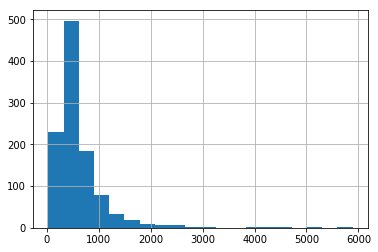

In [14]:
df.Length.hist(bins=20)